In [1]:
# Import the relevant libraries

import numpy as np 
import pandas as pd 
import helper_functions
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Read in the dataset
data_frame = helper_functions.data_all("2012_data.csv")

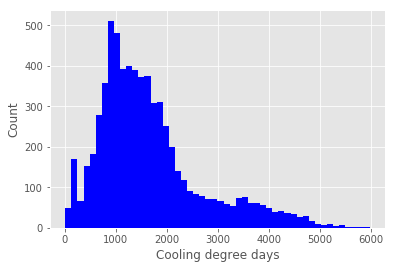

In [3]:
# Heating degree days distribution
plt.hist(data_frame['CDD65'], bins = 50, color = "b")
plt.xlabel('Cooling degree days')
plt.ylabel('Count')
plt.show()

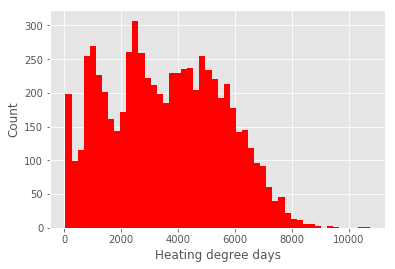

In [4]:
# Cooling degree days distribution
plt.hist(data_frame['HDD65'], bins = 50, color = "r")
plt.xlabel('Heating degree days')
plt.ylabel('Count')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


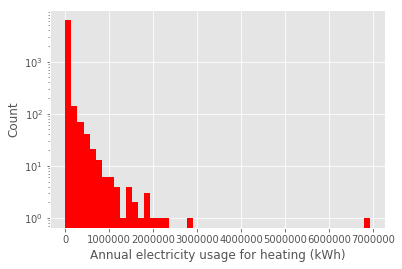

In [5]:
# Plot a histogram of annual usage of electricity for heating
plt.hist(data_frame['ELHTBTU']/3.142, color = "r", bins = 50)
plt.yscale('log')
plt.xlabel("Annual electricity usage for heating (kWh)")
plt.ylabel("Count")
plt.show()

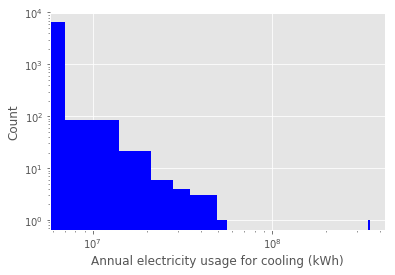

In [6]:
# Plot a histogram of annual usage of electricity for cooling
plt.hist(data_frame['ELCLBTU']/3.142, color = "b", bins = 50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Annual electricity usage for cooling (kWh)")
plt.ylabel("Count")
plt.show()

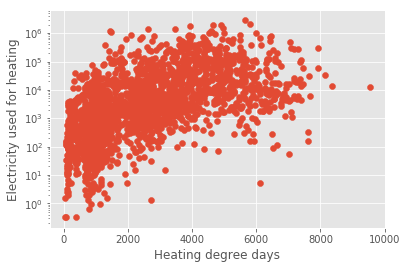

In [7]:
# Annual electricity usage for heating vs HDD
# Filter to only buildings that actually use electricity for heating
elec_heating = data_frame[data_frame['ELHT1']==1]

# Scatter plot, converting BTU*10^3 to kWh
plt.scatter(elec_heating['HDD65'], elec_heating['ELHTBTU']/3.142)
plt.xlabel("Heating degree days")
plt.ylabel("Electricity used for heating")
plt.yscale('log')
plt.show()

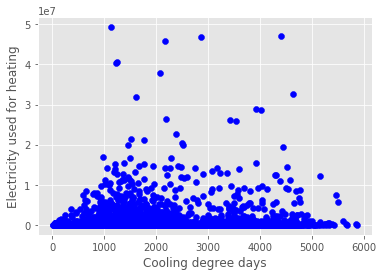

In [8]:
# Annual electricity usage for cooling vs CDD
# Filter to only buildings that actually use electricity for heating
# second condition is just to get rid of the one massive outlier
elec_heating = data_frame[np.logical_and(data_frame['ELCOOL']==1, data_frame['ELCLBTU']<1000000000)]

# Scatter plot, converting BTU*10^3 to kWh
plt.scatter(elec_heating['CDD65'], elec_heating['ELCLBTU']/3.142, color = 'b')
plt.xlabel("Cooling degree days")
plt.ylabel("Electricity used for heating")
plt.show()

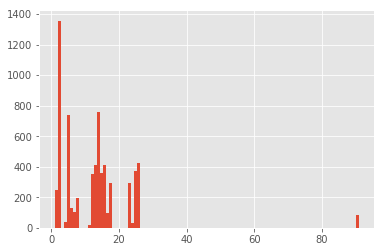

In [40]:
# Data by building usage
plt.hist(data_frame['PBA'], bins = 100)
plt.show()
# y = ['Vacant','Office', 'Laboratory', 'Nonrefrigerated warehouse', 'Food sales', 
        #                 'Public order and safety', 'Outpatient health care','Refrigerated warehouse',
        #                 'Religious worship', 'Public assembly', 'Education','Food service', 'Inpatient health care',
        #                 'Nursing', 'Lodging', 'Strip shopping mall', 'Enclosed mall', 'Retail other than mall', 'Service',
        #                 'Other'], 

In [41]:
# Get the annual electricity usage figure for buildings using electricity for primary heating normalised by floor area
df = data_frame[data_frame['PBA']==2]
print("Number of buildings included in the sample is: {}".format(len(df)))

elec_heating = df['ELCLBTU'][df['ELHT1']==1]/3.142
floor_space = df['SQFT'][df['ELHT1']==1]/10.764
norm_heating = elec_heating/floor_space
print("Number of buildings heated with electricity is {}".format(len(norm_heating)))

Number of buildings included in the sample is: 1356
Number of buildings heated with electricity is 545


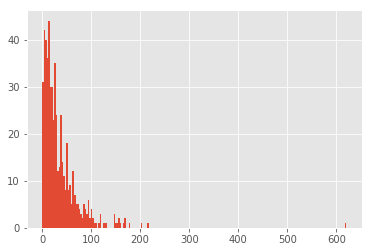

In [42]:
plt.hist(norm_heating, 200)
plt.show()


In [43]:
len(norm_heating)

545